<a href="https://colab.research.google.com/github/evelynda1985/DataScience/blob/master/SklearnPracticalExample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [3]:
import google.colab
google.colab.files.upload()

Saving 1.04.Real-lifeExample.csv to 1.04.Real-lifeExample.csv


{'1.04.Real-lifeExample.csv': b'\xef\xbb\xbfBrand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model\r\nBMW,4200,sedan,277,2,Petrol,yes,1991,320\r\nMercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212\r\nMercedes-Benz,13300,sedan,358,5,Gas,yes,2003,S 500\r\nAudi,23000,crossover,240,4.2,Petrol,yes,2007,Q7\r\nToyota,18300,crossover,120,2,Petrol,yes,2011,Rav 4\r\nMercedes-Benz,199999,crossover,0,5.5,Petrol,yes,2016,GLS 63\r\nBMW,6100,sedan,438,2,Gas,yes,1997,320\r\nAudi,14200,vagon,200,2.7,Diesel,yes,2006,A6\r\nRenault,10799,vagon,193,1.5,Diesel,yes,2012,Megane\r\nVolkswagen,1400,other,212,1.8,Gas,no,1999,Golf IV\r\nRenault,11950,vagon,177,1.5,Diesel,yes,2011,Megane\r\nRenault,2500,sedan,260,1.79,Petrol,yes,1994,19\r\nAudi,9500,vagon,165,2.7,Gas,yes,2003,A6 Allroad\r\nVolkswagen,10500,sedan,100,1.8,Petrol,yes,2008,Passat B6\r\nToyota,16000,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100\r\nRenault,8600,hatch,84,1.5,Diesel,yes,2012,Clio\r\nBMW,2990,other,203,2,Petrol,no,

In [4]:
raw_data = pd.read_csv('1.04.Real-lifeExample.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [6]:
#Let's predict the price for used cars
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
#Let's clean the data
#Removing model because it doesn't support the analysis that much, we can figured out price with other factors like year, Brand, engine
data = raw_data.drop(['Model'], axis = 1) # axis = 0 it is for rows and axis = 1 it is for columns
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [9]:
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [10]:
# if you are removing < 5% of the observations you are free to just remove all the have MV (Missing Values)
#Price and engine has null values, we can remove them
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/tmp/ipython-input-216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

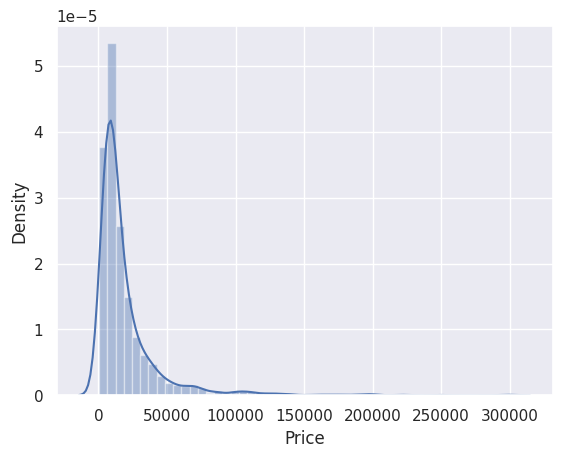

In [11]:
sns.distplot(data_no_mv['Price'])

In [12]:
#We were looking for a normal distribution
#But we got an exponantial one
#mean	19552.308065
#std		25815.734988
#min		600.000000
#25%		6999.000000
#50%		11500.000000
#75%		21900.000000
#max		300000.000000
#Prices are very different for example 25% are 6999 but max is 300000

In [13]:
#Outliers = observations that lie on abnormal distance from toher observations in the data
# the way to fix that is remove top 1% of the observations
# the simplest way to do it is:
q = data_no_mv['Price'].quantile(0.99) #99 percent tail means which amout where over 99% data
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


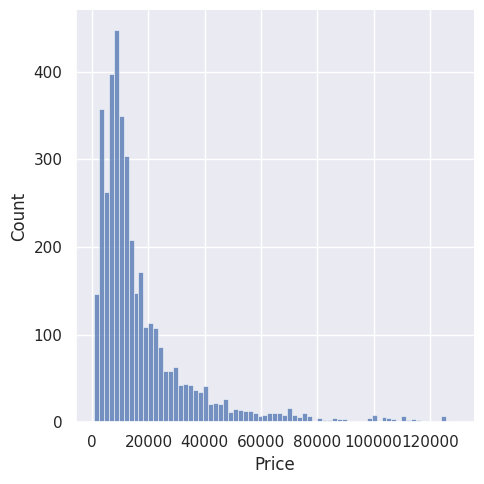

In [14]:
sns.displot(data_1['Price'])

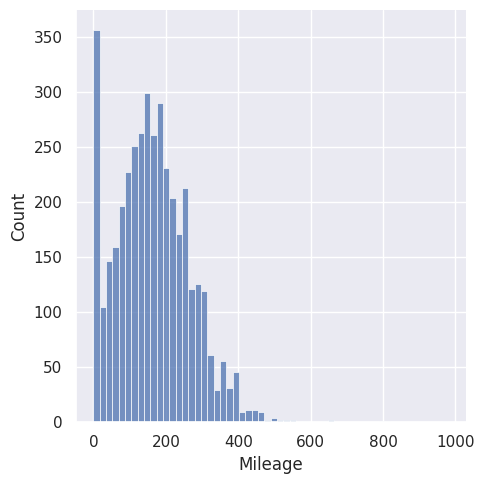

In [15]:
sns.displot(data_no_mv['Mileage'])

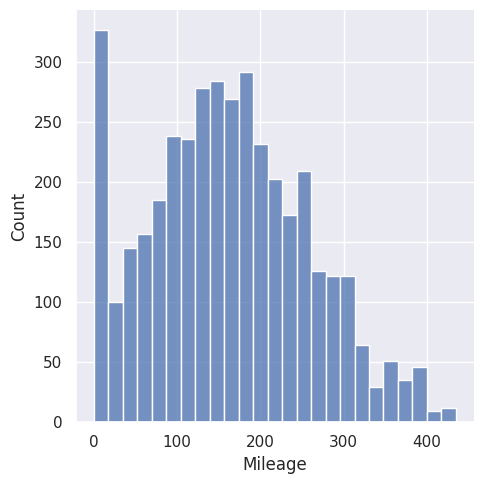

In [19]:
#Pretty similar issue with the Price
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

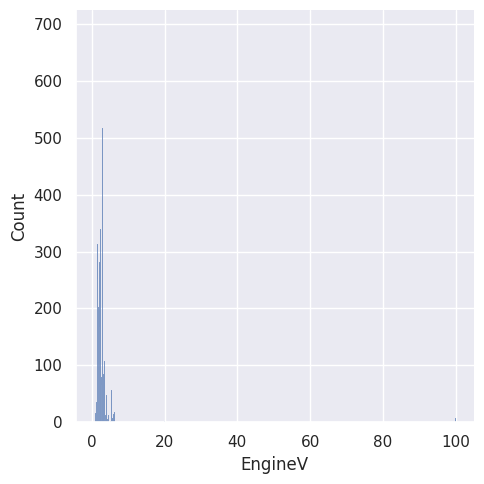

In [20]:
sns.displot(data_no_mv['EngineV'])

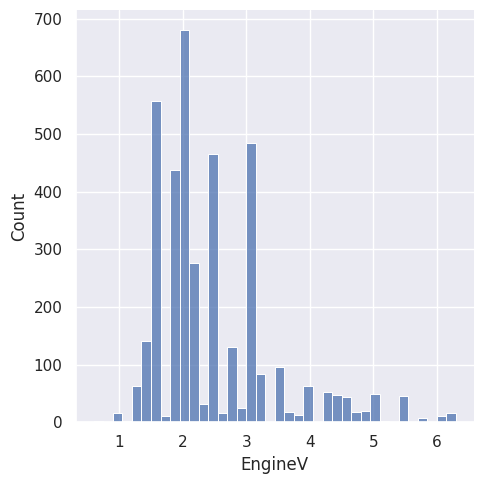

In [21]:
#For engines we found = 99 and for engines that is not valida value
#Engines 06 to 6.5
data_3 = data_2[data_2['EngineV']<6.5]
sns.displot(data_3['EngineV'])

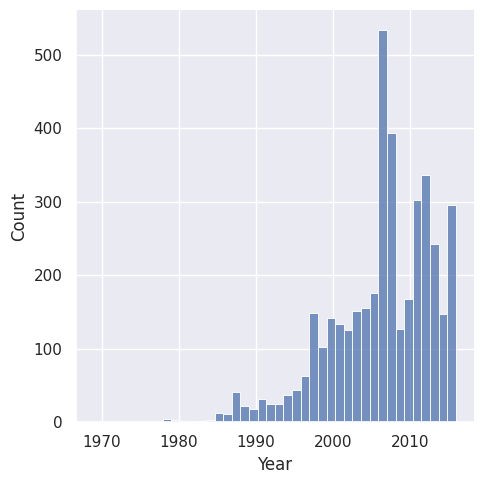

In [22]:
sns.displot(data_no_mv['Year'])

In [23]:
#Few vintage ones
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

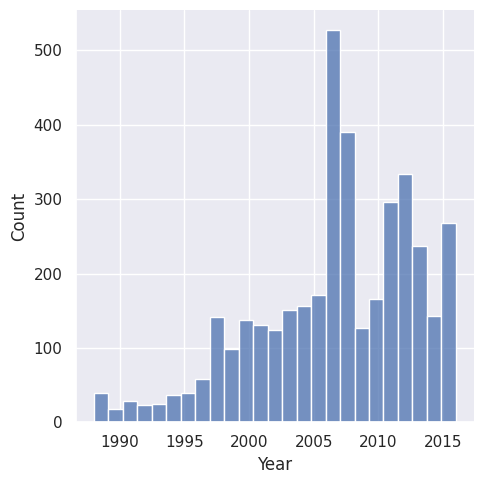

In [24]:
sns.displot(data_4['Year'])

In [26]:
#We delete about 250 observations
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions